In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('brca.csv')

In [3]:
data.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
data['y'] = data['y'].map({'B': 0, 'M': 1})

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)


In [6]:
print(data.isnull().sum())
# Fill or drop missing values if necessary
data = data.dropna()  # or use data.fillna(value)


x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64


In [7]:
# scaling features on scale of 1 to keep all on same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('y', axis=1))
y = data['y']


In [8]:
data.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and you want to split 'data' into features (X) and target (y)
X = data.drop('y', axis=1)  # Replace 'target_column' with the name of your target column
y = data['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (455, 30) (455,)
Testing set shape: (114, 30) (114,)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)


Training Mean Squared Error: 0.0048347252747252744
Testing Mean Squared Error: 0.03807631578947369


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training Mean Absolute Error:", train_mae)
print("Testing Mean Absolute Error:", test_mae)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)


Training Mean Absolute Error: 0.027560439560439562
Testing Mean Absolute Error: 0.07640350877192983
Training R-squared: 0.9792918235610544
Testing R-squared: 0.8379168686537831


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.9473684210526315


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9385964912280702


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.956140350877193


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9385964912280702


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'data' is your DataFrame and you want to split 'data' into features (X) and target (y)
X = data.drop('y', axis=1)  # Replace 'target_column' with the name of your target column
y = data['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Perform cross-validation
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

print("Logistic Regression CV Accuracy:", logreg_scores.mean())
print("SVM CV Accuracy:", svm_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())
print("KNN CV Accuracy:", knn_scores.mean())


Logistic Regression CV Accuracy: 0.9802197802197803
SVM CV Accuracy: 0.9736263736263737
Random Forest CV Accuracy: 0.956043956043956
KNN CV Accuracy: 0.9736263736263737


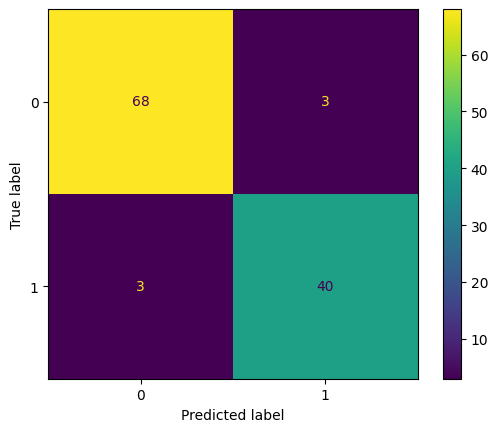

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


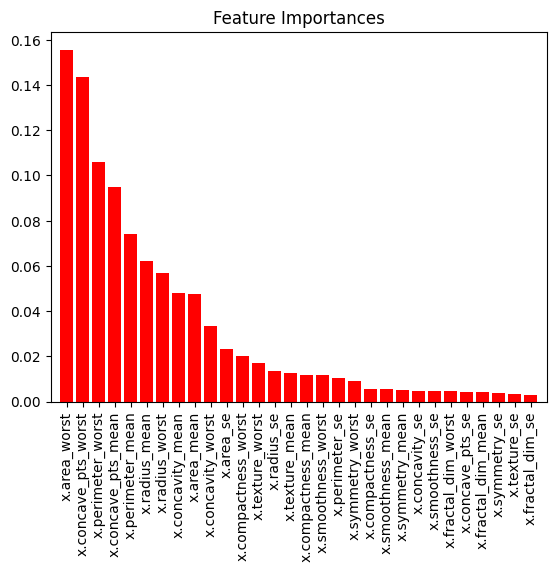

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


In [20]:
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)


Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


In [21]:
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Best parameters for Random Forest: {'max_features': 'sqrt', 'n_estimators': 500}


In [22]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
print("Best parameters for KNN:", grid_search_knn.best_params_)


Best parameters for KNN: {'n_neighbors': 5}


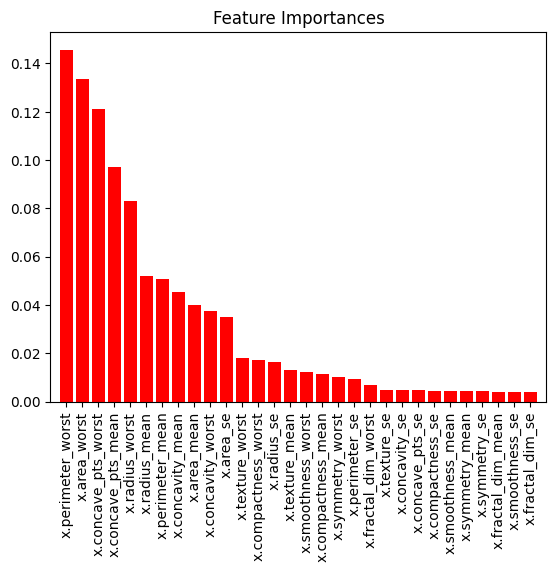

In [23]:
# Fit the model with best parameters from GridSearchCV
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = best_rf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Random Forest ROC-AUC Score: 0.9924664264657714


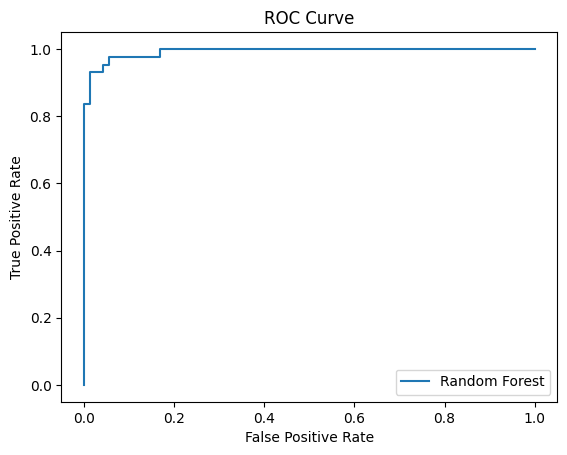

In [24]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


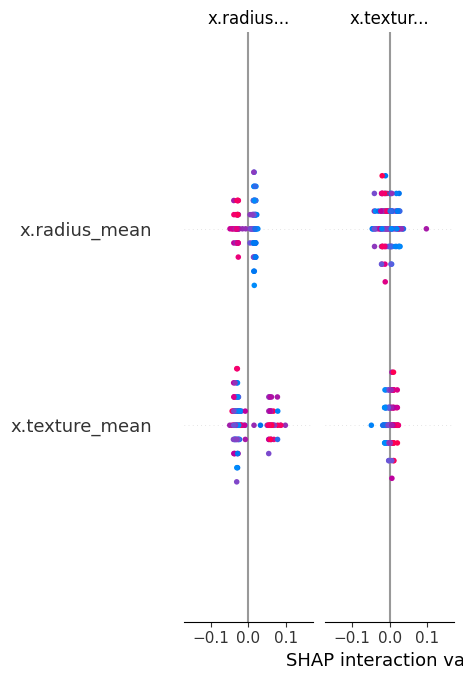

In [25]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'probability': [True]}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)


Best parameters for SVM: {'C': 10, 'kernel': 'rbf', 'probability': True}


In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming grid_search_logreg, grid_search_svm, best_rf, and grid_search_knn are already defined
ensemble_model = VotingClassifier(estimators=[
    ('logreg', grid_search_logreg.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('rf', best_rf),
    ('knn', grid_search_knn.best_estimator_)
], voting='soft')
ensemble_model.fit(X_train_scaled, y_train)
ensemble_accuracy = accuracy_score(y_test, ensemble_model.predict(X_test_scaled))
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.9824561403508771


In [34]:
import nest_asyncio
nest_asyncio.apply()

from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = best_rf.predict([data['features']])
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [38]:
%run app.py

 * Serving Flask app 'app'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [39]:
import joblib

# Save the model
joblib.dump(best_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [40]:
# Load the model
loaded_model = joblib.load('random_forest_model.pkl')


In [41]:
# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
print(X_train.columns)


Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst'],
      dtype='object')


In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# New data for prediction with all required features
new_data = pd.DataFrame({
    'x.radius_mean': [14.50, 15.80, 13.64],
    'x.texture_mean': [14.34, 17.72, 16.85],
    'x.perimeter_mean': [98.45, 120.53, 90.67],
    'x.area_mean': [609.2, 856.7, 583.3],
    'x.smoothness_mean': [0.102, 0.110, 0.098],
    'x.compactness_mean': [0.085, 0.089, 0.083],
    'x.concavity_mean': [0.065, 0.072, 0.062],
    'x.concave_pts_mean': [0.040, 0.046, 0.042],
    'x.symmetry_mean': [0.175, 0.178, 0.176],
    'x.fractal_dim_mean': [0.060, 0.070, 0.065],
    'x.radius_se': [0.35, 0.40, 0.38],
    'x.texture_se': [1.15, 1.20, 1.12],
    'x.perimeter_se': [2.3, 2.6, 2.4],
    'x.area_se': [18.9, 24.3, 21.5],
    'x.smoothness_se': [0.005, 0.006, 0.005],
    'x.compactness_se': [0.028, 0.036, 0.031],
    'x.concavity_se': [0.020, 0.025, 0.023],
    'x.concave_pts_se': [0.017, 0.022, 0.020],
    'x.symmetry_se': [0.030, 0.032, 0.031],
    'x.fractal_dim_se': [0.002, 0.003, 0.002],
    'x.radius_worst': [15.90, 18.20, 14.80],
    'x.texture_worst': [20.21, 22.32, 18.54],
    'x.perimeter_worst': [108.43, 132.67, 105.25],
    'x.area_worst': [689.2, 1023.4, 722.1],
    'x.smoothness_worst': [0.142, 0.154, 0.137],
    'x.compactness_worst': [0.172, 0.180, 0.168],
    'x.concavity_worst': [0.230, 0.240, 0.220],
    'x.concave_pts_worst': [0.130, 0.134, 0.128],
    'x.symmetry_worst': [0.292, 0.305, 0.285],
    'x.fractal_dim_worst': [0.075, 0.080, 0.072]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions on the scaled new data
new_predictions = rf.predict(new_data_scaled)

print("Predictions for new data:", new_predictions)


Predictions for new data: [0 0 0]


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example mixed data for prediction
mixed_data = pd.DataFrame({
    'x.radius_mean': [14.50, 20.29, 21.37],
    'x.texture_mean': [14.34, 14.34, 20.89],
    'x.perimeter_mean': [98.45, 135.10, 138.90],
    'x.area_mean': [609.2, 1297.0, 1300.0],
    'x.smoothness_mean': [0.102, 0.1003, 0.1053],
    'x.compactness_mean': [0.085, 0.1328, 0.1302],
    'x.concavity_mean': [0.065, 0.1980, 0.2106],
    'x.concave_pts_mean': [0.040, 0.1043, 0.1204],
    'x.symmetry_mean': [0.175, 0.1809, 0.1852],
    'x.fractal_dim_mean': [0.060, 0.05883, 0.06233],
    'x.radius_se': [0.35, 0.726, 0.722],
    'x.texture_se': [1.15, 0.786, 0.830],
    'x.perimeter_se': [2.3, 8.589, 7.087],
    'x.area_se': [18.9, 153.40, 154.90],
    'x.smoothness_se': [0.005, 0.006399, 0.006392],
    'x.compactness_se': [0.028, 0.04904, 0.04877],
    'x.concavity_se': [0.020, 0.05373, 0.04977],
    'x.concave_pts_se': [0.017, 0.01587, 0.01789],
    'x.symmetry_se': [0.030, 0.03003, 0.02833],
    'x.fractal_dim_se': [0.002, 0.006193, 0.006900],
    'x.radius_worst': [15.90, 23.41, 25.45],
    'x.texture_worst': [20.21, 25.53, 24.39],
    'x.perimeter_worst': [108.43, 158.80, 168.90],
    'x.area_worst': [689.2, 1956.0, 2019.0],
    'x.smoothness_worst': [0.142, 0.1444, 0.1467],
    'x.compactness_worst': [0.172, 0.4245, 0.4394],
    'x.concavity_worst': [0.230, 0.4504, 0.4989],
    'x.concave_pts_worst': [0.130, 0.2430, 0.2584],
    'x.symmetry_worst': [0.292, 0.3613, 0.3662],
    'x.fractal_dim_worst': [0.075, 0.08758, 0.09313]
})

# Ensure all feature names match the training set
mixed_data = mixed_data[X_train.columns]

# Initialize and fit the scaler on the training data (if not already done)
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the mixed data
mixed_data_scaled = pd.DataFrame(scaler.transform(mixed_data), columns=X_train.columns)

# Make predictions on the scaled mixed data
mixed_predictions = rf.predict(mixed_data_scaled)

print("Predictions for mixed data:", mixed_predictions)


Predictions for mixed data: [0 1 1]


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example new mixed data for prediction
new_mixed_data = pd.DataFrame({
    'x.radius_mean': [14.50, 20.29, 15.90],
    'x.texture_mean': [14.34, 14.34, 18.54],
    'x.perimeter_mean': [98.45, 135.10, 120.25],
    'x.area_mean': [609.2, 1297.0, 910.1],
    'x.smoothness_mean': [0.102, 0.1003, 0.1153],
    'x.compactness_mean': [0.085, 0.1328, 0.1202],
    'x.concavity_mean': [0.065, 0.1980, 0.1906],
    'x.concave_pts_mean': [0.040, 0.1043, 0.1054],
    'x.symmetry_mean': [0.175, 0.1809, 0.1752],
    'x.fractal_dim_mean': [0.060, 0.05883, 0.06233],
    'x.radius_se': [0.35, 0.726, 0.522],
    'x.texture_se': [1.15, 0.786, 0.630],
    'x.perimeter_se': [2.3, 8.589, 5.987],
    'x.area_se': [18.9, 153.40, 124.80],
    'x.smoothness_se': [0.005, 0.006399, 0.006221],
    'x.compactness_se': [0.028, 0.04904, 0.04178],
    'x.concavity_se': [0.020, 0.05373, 0.04325],
    'x.concave_pts_se': [0.017, 0.01587, 0.01895],
    'x.symmetry_se': [0.030, 0.03003, 0.03133],
    'x.fractal_dim_se': [0.002, 0.006193, 0.003872],
    'x.radius_worst': [15.90, 23.41, 24.20],
    'x.texture_worst': [20.21, 25.53, 21.89],
    'x.perimeter_worst': [108.43, 158.80, 154.23],
    'x.area_worst': [689.2, 1956.0, 1742.0],
    'x.smoothness_worst': [0.142, 0.1444, 0.1387],
    'x.compactness_worst': [0.172, 0.4245, 0.3268],
    'x.concavity_worst': [0.230, 0.4504, 0.3389],
    'x.concave_pts_worst': [0.130, 0.2430, 0.2101],
    'x.symmetry_worst': [0.292, 0.3613, 0.3128],
    'x.fractal_dim_worst': [0.075, 0.08758, 0.09183]
})

# Ensure all feature names match the training set
new_mixed_data = new_mixed_data[X_train.columns]

# Initialize and fit the scaler on the training data (if not already done)
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the new mixed data
new_mixed_data_scaled = pd.DataFrame(scaler.transform(new_mixed_data), columns=X_train.columns)

# Make predictions on the scaled mixed data
new_mixed_predictions = rf.predict(new_mixed_data_scaled)

print("Predictions for new mixed data:", new_mixed_predictions)


Predictions for new mixed data: [0 1 0]


In [54]:
import shap

# Load your model
model = rf

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Verify shapes
print("Shape of SHAP values (class 1):", shap_values[1].shape)
print("Shape of X_test:", X_test.shape)

# Summary plot
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)


Shape of SHAP values (class 1): (30, 2)
Shape of X_test: (114, 30)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [67]:
import pandas as pd

results = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, rf_predictions),
        accuracy_score(y_test, svm_predictions),
        accuracy_score(y_test, logreg_predictions),
        accuracy_score(y_test, knn_predictions)
    ],
    'Precision': [
        classification_report(y_test, rf_predictions, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, svm_predictions, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, logreg_predictions, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, knn_predictions, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, rf_predictions, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, svm_predictions, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, logreg_predictions, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, knn_predictions, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, rf_predictions, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, svm_predictions, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, logreg_predictions, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, knn_predictions, output_dict=True)['weighted avg']['f1-score']
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Random Forest  0.956140   0.956905  0.956140  0.955801  0.991811
1                  SVM  0.929825   0.930832  0.929825  0.929074  0.971831
2  Logistic Regression  0.947368   0.948419  0.947368  0.947591  0.991484
3                  KNN  0.938596   0.939018  0.938596  0.938732  0.976908
